<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 5. <b>Регрессия, классификация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [988]:
surname = "Першин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задача 1.</b> Регрессия</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома (см. Семинар 7) с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [959]:
#0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval
from sklearn.metrics import mean_squared_error

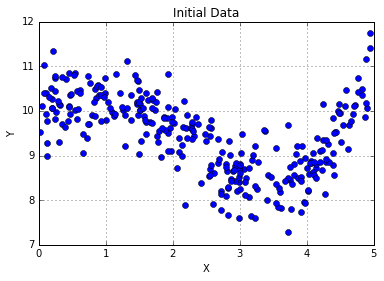

In [960]:
#1) Исходные данные
df = pnd.read_csv("Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [961]:
#2) Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

In [962]:
x_train=np.array([x_train]).T
x_val=np.array([x_val]).T
x_test=np.array([x_test]).T

In [963]:
mse1_y=[0 for x in range(25)]
mse2_y=[0 for x in range(25)]
R1 = [0 for x in range(25)]
R2 = [0 for x in range(25)]
for i in range(1, 25):
    plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
    plModelTr_PL = plModelTr_PL.fit(x_train, y_train)
    f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
    y_pr_val = plModelTr_PL.predict(x_val)
    y_pr_train = plModelTr_PL.predict(x_train)
    mse1_y[i] = mean_squared_error(y_train, y_pr_train)
    mse2_y[i] = mean_squared_error(y_val, y_pr_val)
    R1[i] = plModelTr_PL.score(x_train, y_train)
    R2[i] = plModelTr_PL.score(x_val, y_val)

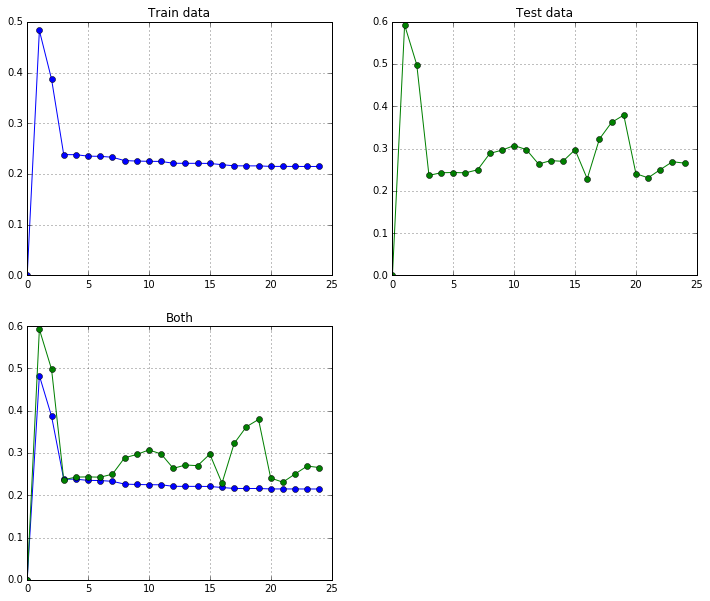

In [964]:
#4) Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(mse1_y, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(mse1_y, "-o")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)
plt.show()

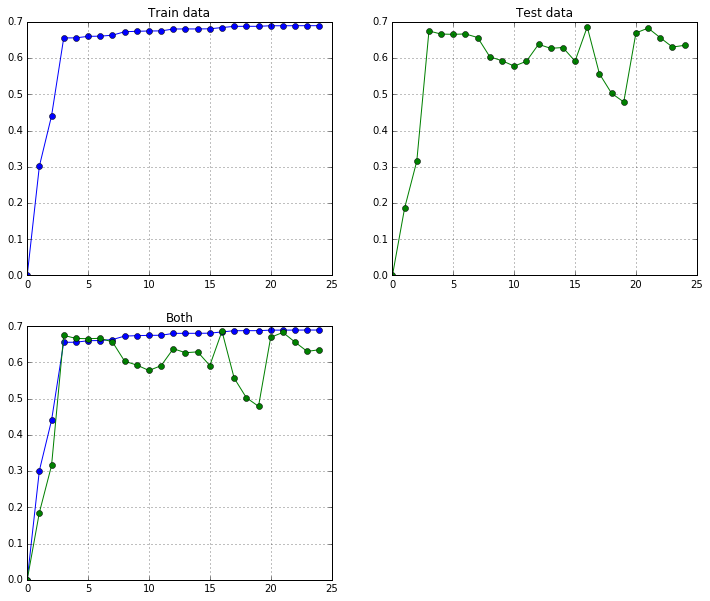

In [965]:
#5) Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(R1, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(R1, "-o")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.show()

In [966]:
#6) Выбор степени полинома + повторное обучение модели на train_init
# согласно графикам, наилучшая степень полинома равноа 16
x_train_init=np.array([x_train_init]).T
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
plModelTr_PL = plModelTr_PL.fit(x_train_init, y_train_init)
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

In [967]:
#7) Cреднеквадратическая ошибка на тестовом подмножестве
y_pr_test = plModelTr_PL.predict(x_test)
mse = mean_squared_error(y_test, y_pr_test)
print("среднеквадратичная ошибка=", mse)

среднеквадратичная ошибка= 0.260193129438


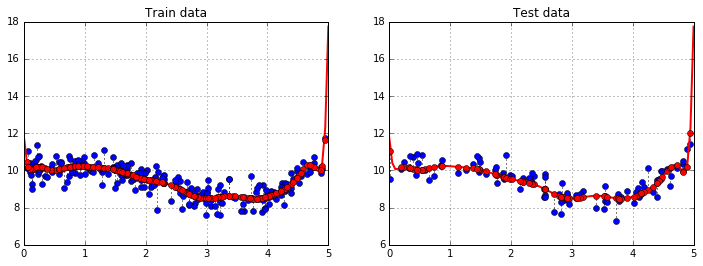

In [968]:
#8) График функции регрессии (наилучший случай) + исходные данные
xx = np.linspace(0,5,100)
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train_init, y_train_init, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train_init, f_x(x_train_init), "o", color="red", lw=2)
plt.vlines(x_train_init, ymin=y_train_init, ymax=f_x(x_train_init), colors="black", linestyles="dotted")
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted")
plt.grid(True)

plt.show()

<p><b>Задача 2.</b> Классификация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

In [969]:
#0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["green", "red"])

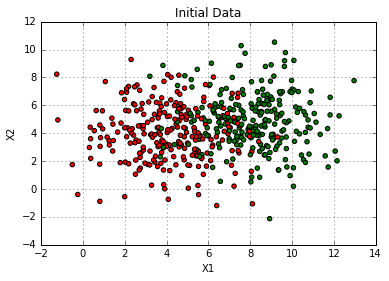

In [970]:
#1) Исходные данные
df = pnd.read_csv("Cl_A5_V"+str(variant)+".csv") #variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

In [971]:
x = df[["X1", "X2"]].values
y = df.Y.values

In [972]:
#2) Формирование обучающего и тестового подмножеств
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

In [973]:
R1 = [0 for x in range(25)]
R2 = [0 for x in range(25)]
for i in range(1, 25):
    plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LogisticRegression(penalty="l2",  fit_intercept=True, C=1e5, solver="lbfgs", random_state=12345))])
    plModelTr_PL = plModelTr_PL.fit(x_train.astype(float), y_train.astype(int))
    f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
    y_pr_val = plModelTr_PL.predict(x_val)
    y_pr_train = plModelTr_PL.predict(x_train)
    R1[i] = plModelTr_PL.score(x_train.astype(float), y_train.astype(int))
    R2[i] = plModelTr_PL.score(x_val.astype(float), y_val.astype(int))

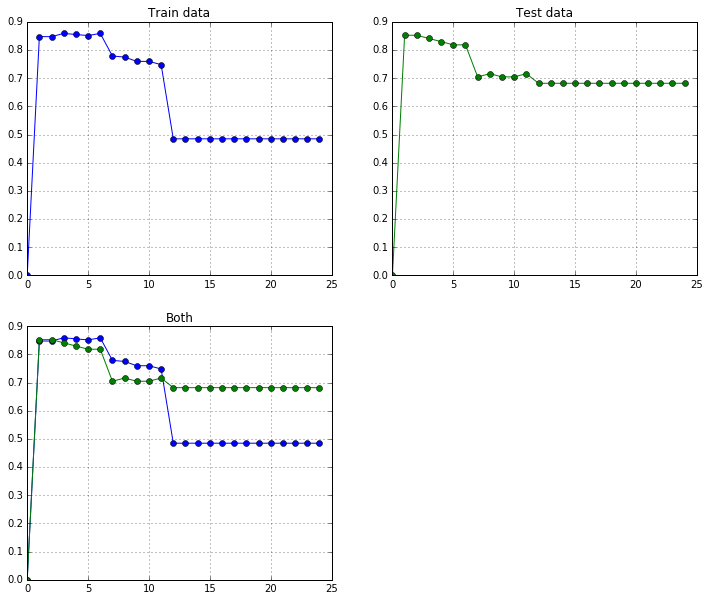

In [974]:
#4) Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(R1, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(R1, "-o")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.show()

In [975]:
#5) Выбор степени полинома + повторное обучение модели на train
# Мы выбираем степень полинома равную 3
R1 = [0 for x in range(100)]
R2 = [0 for x in range(100)]
for i in range(1, 100):
    plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", LogisticRegression(penalty="l2", max_iter=i,  fit_intercept=True, C=1e5, solver="lbfgs", random_state=12345))])
    plModelTr_PL = plModelTr_PL.fit(x_train.astype(float), y_train.astype(int))
    f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
    y_pr_val = plModelTr_PL.predict(x_val)
    y_pr_train = plModelTr_PL.predict(x_train)
    R1[i] = plModelTr_PL.score(x_train.astype(float), y_train.astype(int))
    R2[i] = plModelTr_PL.score(x_val.astype(float), y_val.astype(int))

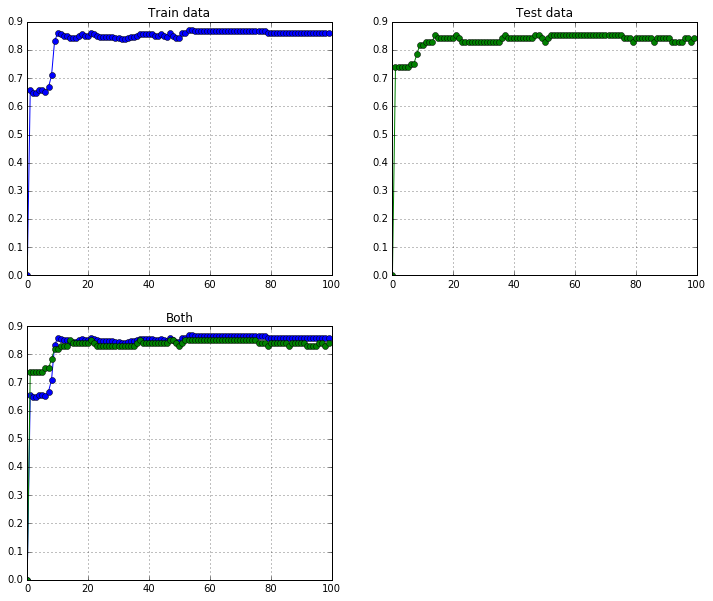

In [976]:
#6) Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного
#подмножеств для наилучшего случая - изменение параметра max_iter
plt.figure(1, figsize=[12, 10])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(R1, "-o")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Test data")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Both")
plt.plot(R1, "-o")
plt.plot(R2, "-o", color = "green")
plt.grid(True)

plt.show()

In [977]:
# выбираем max_iter=20

In [978]:
#7) Повторное обучение модели на train_init
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", LogisticRegression(penalty="l2", max_iter=20,  fit_intercept=True, C=1e5, solver="lbfgs", random_state=12345))])
plModelTr_PL = plModelTr_PL.fit(x_train_init.astype(float), y_train_init.astype(int))
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
y_pr_val = plModelTr_PL.predict(x_test)
y_pr_train = plModelTr_PL.predict(x_train_init)

In [987]:
#7) График результата классификации для наилучшего случая для обучающего и тестового подмножеств
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))
points = np.c_[xx.ravel(), yy.ravel()]
Z = plModelTr_PL.predict_proba(points)[:, 1]
Z = Z.reshape(xx.shape)

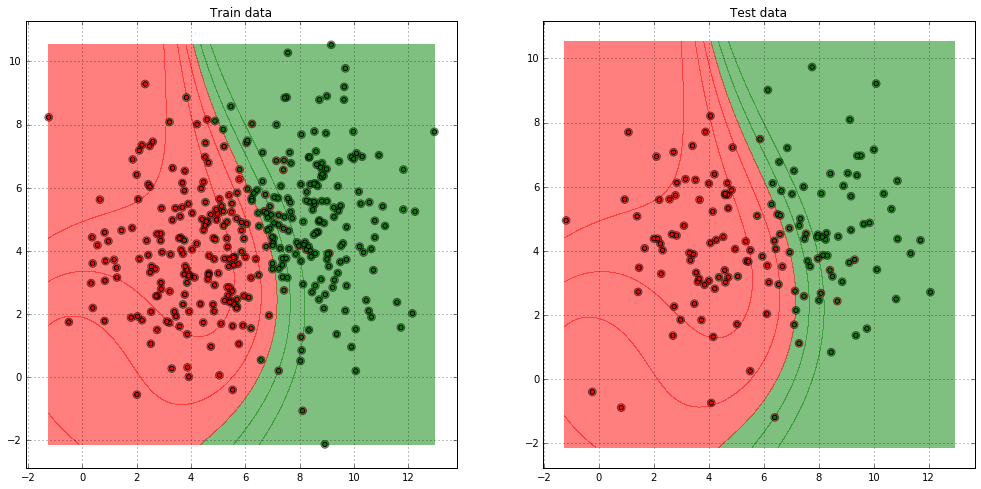

In [986]:
plt.figure(1, figsize=[17, 8])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train_init[:,0], x_train_init[:,1], c=y_train_init, s=60,  cmap=clrMap, alpha=0.5)
plt.scatter(x_train_init[:, 0], x_train_init[:, 1], c=plModelTr_PL.predict(x_train_init), s=20,cmap=clrMap, alpha=1)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=clrMap,s=60, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=plModelTr_PL.predict(x_test),s=20, cmap=clrMap)
plt.grid(True)

plt.show()